In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the dataset as a pandas DataFrame
chr_analytic_csv_path = Path.cwd().parent / "data" / "chr_analytic_data2022.csv"
chr_analytic_df = pd.read_csv(chr_analytic_csv_path, skiprows=1)



In [5]:
# Generate a mapping that converts variable names to their descriptions
VAR_DESCRIPTION_MAPPING = dict((k, v) for (v, k) in pd.read_csv(chr_analytic_csv_path, nrows=1).iloc[0].items())


In [6]:
# Find correlation between columns
corr = chr_analytic_df.corr(method="pearson", numeric_only=True)
corr

,statecode,countycode,fipscode,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,v001_cilow,v001_cihigh,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
statecode,1.000000,0.164398,0.999976,NaN,-0.006941,-0.061610,-0.040196,-0.040763,-0.068275,-0.043465,...,-0.007980,-0.040517,-0.040507,NaN,NaN,0.013596,0.001459,-0.029821,NaN,NaN
countycode,0.164398,1.000000,0.171292,NaN,-0.012517,0.086991,-0.035069,-0.035367,0.062290,0.095500,...,0.026943,-0.035179,-0.035176,NaN,NaN,-0.071063,-0.107668,-0.089761,NaN,NaN
fipscode,0.999976,0.171292,1.000000,NaN,-0.007022,-0.060922,-0.040397,-0.040965,-0.067754,-0.042738,...,-0.007779,-0.040718,-0.040708,NaN,NaN,0.013074,0.000691,-0.030423,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_ranked,-0.006941,-0.012517,-0.007022,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.101481,0.043405,0.043472,NaN,NaN,-0.182232,0.148991,0.043083,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v058_rawvalue,0.013596,-0.071063,0.013074,NaN,-0.182232,0.239665,-0.061064,-0.064156,-0.006537,0.433985,...,-0.200306,-0.064358,-0.064271,NaN,NaN,1.000000,-0.125524,-0.202429,NaN,NaN
v058_numerator,0.001459,-0.107668,0.000691,NaN,0.148991,-0.043915,0.862065,0.793651,0.027595,-0.096699,...,0.057899,0.797529,0.795690,NaN,NaN,-0.125524,1.000000,0.796579,NaN,NaN
v058_denominator,-0.029821,-0.089761,-0.030423,NaN,0.043083,-0.086701,0.983967,0.998386,-0.017042,-0.131505,...,0.062824,0.998371,0.998257,NaN,NaN,-0.202429,0.796579,1.000000,NaN,NaN
v058_cilow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def make_plot(given_x,given_y):
    # takes x and y values (id's from the data set) and creates a scatter plot against 2 values
    plot = chr_analytic_df.plot.scatter(x=given_x,y=given_y,alpha = 0.5)
    plot.set_xlabel(VAR_DESCRIPTION_MAPPING[given_x])
    plot.set_ylabel(VAR_DESCRIPTION_MAPPING[given_y])
    #a,b = np.polyfit(given_x, given_y, 1)
    #plot.plot(given_x, a*given_x+b)

10 variables most correlated with Preventable hospital stays raw value
v070_cilow           Physical inactivity CI low                         0.5260275710303774
v070_rawvalue        Physical inactivity raw value                      0.525931242207064
v070_cihigh          Physical inactivity CI high                        0.5235455489204062
v127_cilow           Premature age-adjusted mortality CI low            0.5171553470397664
v147_rawvalue        Life expectancy raw value                          -0.5112719151620665
v127_rawvalue        Premature age-adjusted mortality raw value         0.5078013047150999
v127_race_white      Premature age-adjusted mortality (White)           0.5056262920781645
v143_cilow           Insufficient sleep CI low                          0.503627595373518
v143_rawvalue        Insufficient sleep raw value                       0.5030748099476409
v002_rawvalue        Poor or fair health raw value                      0.5027763246576143


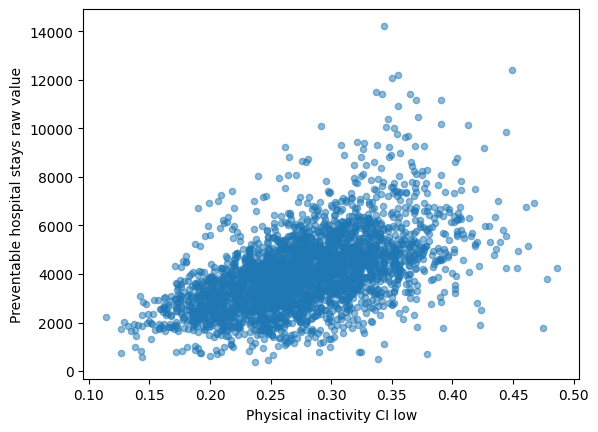

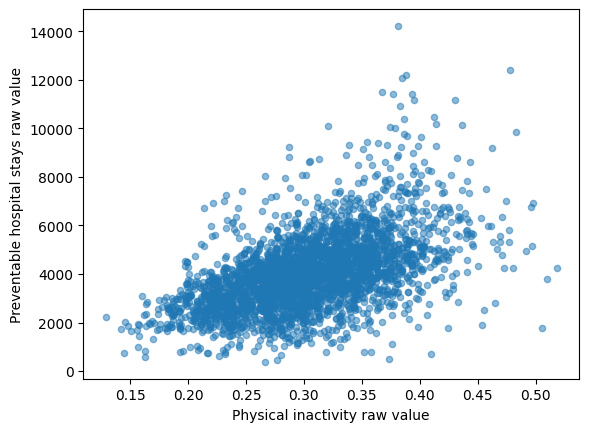

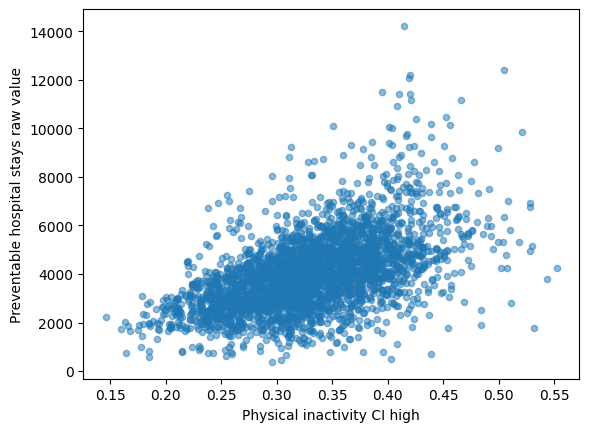

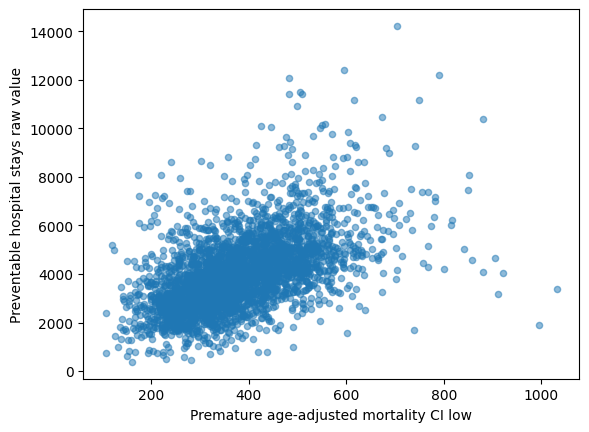

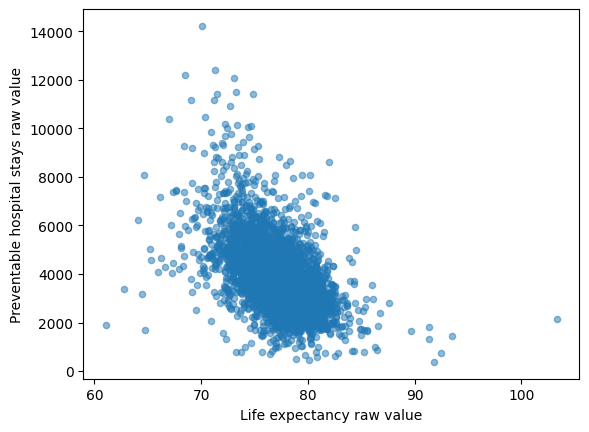

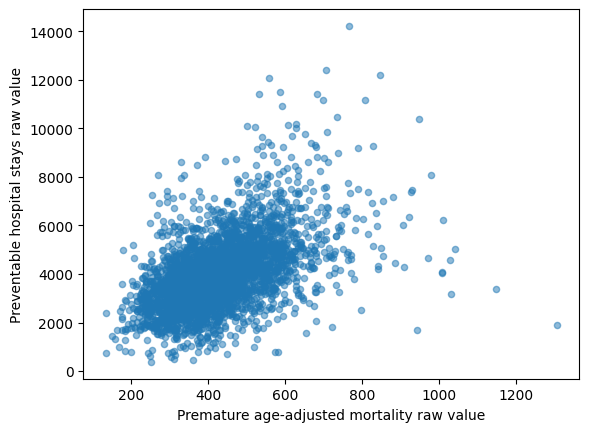

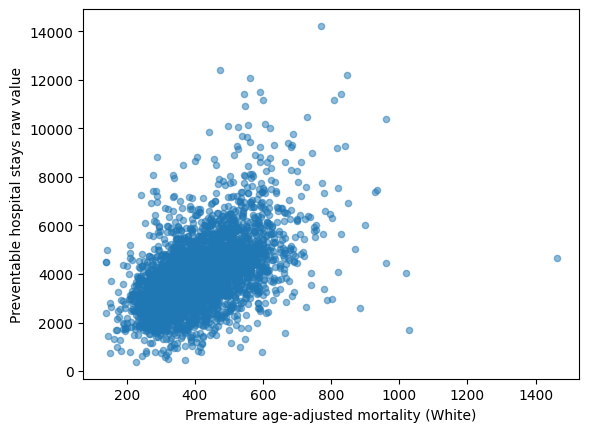

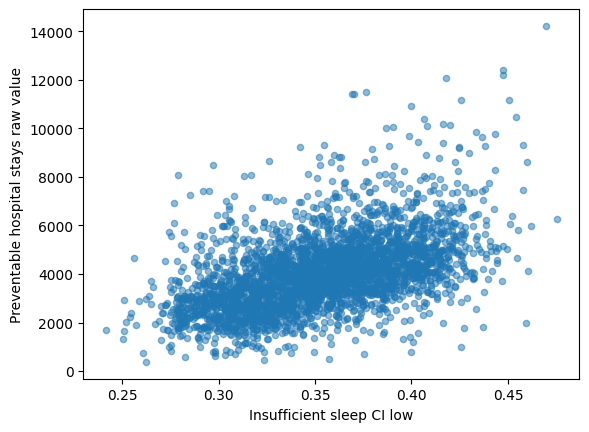

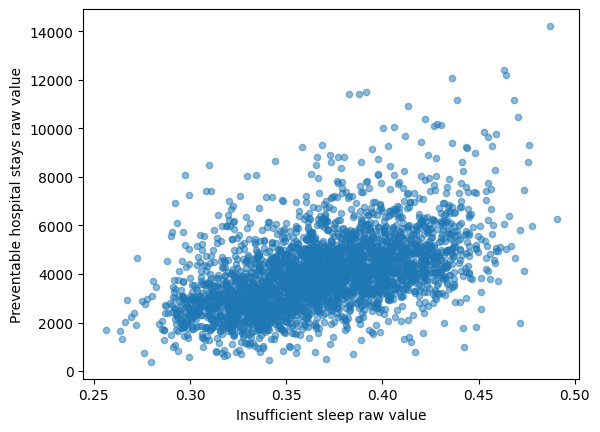

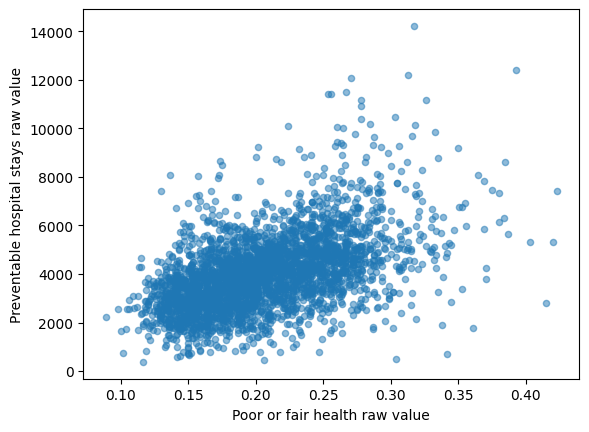

In [8]:
# Create a series containing absolute value of correlations of rows to v005_rawvalue (Preventable hospital stays raw value)
absolute_correlations = abs(corr["v005_rawvalue"])

# Remove rows with labels that contain v005, as these are also preventable hospital stays
for label, value in absolute_correlations.items():
    if "v005" in label:
        absolute_correlations.drop(label, inplace = True)

# Get the ten rows with the most correlation
N_most_correlated = 10
most_correlated = absolute_correlations.nlargest(N_most_correlated)
print(f"{N_most_correlated} variables most correlated with {VAR_DESCRIPTION_MAPPING['v005_rawvalue']}")
for label, value in most_correlated.items():
    print(label.ljust(20), VAR_DESCRIPTION_MAPPING[label].ljust(50), corr.loc["v005_rawvalue", label])
    make_plot(label,'v005_rawvalue')
        